In [1]:
import re
import wfdb
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from utils import *

In [2]:
NB_S_PER_MIN = 6000
SAMPLING_FREQUENCY = 100
LOWER_BOUND_FILTER = 1
UPPER_BOUND_FILTER = 48
NB_S_PER_HALF_MIN = 3000

train_files = ['a01', 'c01', 'b01', 'a02', 'c02', 'b02', 'a03', 'c03', 
              'b03', 'a04', 'c04', 'b04', 'a05', 'c05', 'a06', 'c06', 
              'a07', 'c07', 'a08', 'c08', 'a09', 'a10', 'a11', 'a12', 
              'a13', 'a14', 'a15', 'a16']



test_files = ['b05','c09','c10','a17','a18','a19','a20']
 
# assign directory
directory = './apnea-ecg-database-1.0.0/'

out_directory_train = './week2/Spectrogram/Train/'
out_directory_test = './week2/Spectrogram/Test/'

In [3]:
def bandpass_signal(xn, lower,upper):
    
    
    length = len(xn)
    t = np.linspace(-1, 1, length)

    b, a = signal.butter(3, [lower, upper], btype='bandpass',fs=100)


    zi = signal.lfilter_zi(b, a)

    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, xn)

    return y

In [4]:
#return signals segments in forms of array with the associated label
def create_signals_arrays(source_directory, files, out_directory, csv_path):
    samples = []
    labels = []
    
    
    spc_labels_file = open(out_directory + csv_path, 'a')
    spc_labels_file.write('image,label')
    plt.ioff()    
    for filename in files:
        i = 0
        path = source_directory + filename

        print(filename)
        record = wfdb.rdrecord(path) 
        apnea  = wfdb.rdann (path,'apn')     
        ecg = record.p_signal
        ecg = ecg.reshape(len(ecg))
        ecg = bandpass_signal(ecg, LOWER_BOUND_FILTER, UPPER_BOUND_FILTER)

        length = min (len(apnea.symbol) - 1 , int ((len(ecg) - NB_S_PER_HALF_MIN) / NB_S_PER_MIN))

        for j in range (length):
            label = apnea.symbol[j + 1]
            segment = ecg[NB_S_PER_HALF_MIN + (NB_S_PER_MIN * j) : NB_S_PER_HALF_MIN + (NB_S_PER_MIN * (j+1))]
            #print(segment)
           
            #save spectrogram plot
            spc_file_name = "spc_" + filename + "_" + str(i) + ".png"
            f, t, Sxx = signal.spectrogram(segment, SAMPLING_FREQUENCY)
            plt.pcolormesh(t, f, Sxx, shading='gouraud')
            # x-axis: frequency [Hz]
            # y-axis: time [sec]
            plt.axis('off')
            plt.savefig(out_directory + spc_file_name, bbox_inches='tight', pad_inches = 0.0)
            plt.close()
            #add line to csv
            spc_labels_file.write(spc_file_name + ',' + label + '\n')
            #increment 1
            i += 1
            

            labels.append(apnea.symbol[j + 1])
            #samples.append(ecg[NB_S_PER_MIN/2 + (NB_S_PER_MIN * j) : NB_S_PER_MIN/2 + NB_S_PER_MIN * (j+1)])
            
    spc_labels_file.close()

In [8]:
create_signals_arrays(directory, train_files, out_directory_train, "spc_train_labels.csv")

a01
c01
b01
a02
c02
b02
a03
c03
b03
a04
c04
b04
a05
c05
a06
c06
a07
c07
a08
c08
a09
a10
a11
a12
a13
a14
a15
a16


In [ ]:
create_signals_arrays(directory, test_files, out_directory_test, "spc_test_labels.csv")

b05
c09
c10
a17
a18
a19
a20


In [25]:
#return signals segments in forms of array with the associated label
def create_signals_arrays(source_directory, files):
    samples = []
    labels = []
    for filename in files:
        print(filename)
        labels_session = []
        samples_session =[]
        #load the outputs
        with open('./outputs/' + filename + '.txt', 'r') as file:
            lines = file.readlines()
            for line in lines:
                labels_session.append(1 if re.split(' +', line)[3] == 'A' else 0)
                
        #here we want to make sure that we take the number of samples measured in the output file
        nb_samples_output = int(re.split(' +', lines[-1])[2]) + NB_SAMPLES_PER_MINUTE
        labels_session = labels_session[1:]
        #measure the ecg using wfdb and heartpy
        record = wfdb.rdrecord(source_directory + '/' +  filename)#,  sampfrom = 0, sampto = nb_samples_output)
        #we do this because the number of labels could be bigger than the signal length
        session_ecg = record.p_signal[ (NB_SAMPLES_PER_MINUTE//2) : nb_samples_output]
        session_ecg = session_ecg.reshape(len(session_ecg))

        
        for i in range(0, len(session_ecg), NB_SAMPLES_PER_MINUTE):
            samples_session.append(session_ecg[i : i + NB_SAMPLES_PER_MINUTE])
        if(len(samples_session[-1]) < NB_SAMPLES_PER_MINUTE):
            samples_session = samples_session[:-1]
        labels.extend(labels_session[:len(samples_session)])
        samples.extend(samples_session)
    return np.stack(samples,axis = 0), np.array(labels)

In [26]:
train_signals_samples, train_labels = create_signals_arrays(directory, train_files)

test_signals_samples, test_labels = create_signals_arrays(directory, test_files)

a01
c01
b01
a02
c02
b02
a03
c03
b03
a04
c04
b04
a05
c05
a06
c06
a07
c07
a08
c08
a09
a10
a11
a12
a13
a14
a15
a16
b05
c09
c10
a17
a18
a19
a20


### Preprocessing

In [8]:
def bandpass_signal(xn, lower,upper):
    
    for idx in range
    length = len(xn)
    t = np.linspace(-1, 1, length)

    b, a = signal.butter(3, [lower, upper], btype='bandpass',fs=100)


    zi = signal.lfilter_zi(b, a)

    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, xn)

    return y

def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=1)
    std_x = np.std(x, axis=1)
    
    for idx in range(train_signals_samples.shape[0]):
        x[idx,:] = x[idx,:] - mean_x[idx]
        x[idx,:] = x[idx,:] / std_x[idx]
    return x



SyntaxError: invalid syntax (<ipython-input-8-350a3e481424>, line 3)

In [20]:
print(train_signals_samples.shape[0])
np.std(train_signals_samples,axis=1).shape
standardize(train_signals_samples).shape

13686


(13686, 6000)

# Normalize

sum_of_rows = train_signals_samples.sum(axis=1)
train_signals_samples_norm = train_signals_samples / sum_of_rows[:, np.newaxis]


In [22]:
# Standardize

train_signals_samples = standardize(train_signals_samples)

In [7]:
# Bandpass filter between 3 and 45Hz

idx = 1
y = train_signals_samples_norm[idx,:]
label = train_labels[idx]
print(label)

# The Nyquist rate of the signal.
nyq_rate = fs / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = signal.kaiserord(ripple_db, width)

# The cutoff frequencies of the filter.
f1 = 3
f2 = 45

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = signal.firwin(N-1, [f1/nyq_rate, f2/nyq_rate], window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_y = signal.lfilter(taps, 1.0, y)

0


NameError: name 'fs' is not defined

### Spectrograms for each minute

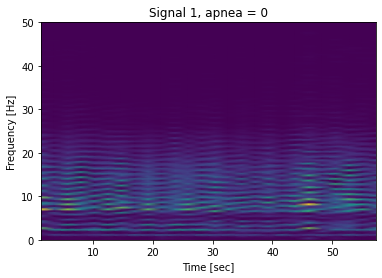

In [11]:
# FFT using blackman window

f, t, Sxx = signal.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Signal " +str(idx) + ', apnea = ' + str(label))
plt.show()

In [12]:
Sxx.shape

(129, 26)

In [10]:
# CWT 
idx = 1
y = train_signals_samples_norm[idx,:]
label = train_labels[idx]
print(label)
fs = 100

0


### All signals

for idx in range(train_signals_samples.shape[0]):
    y = train_signals_samples[idx,:]
    f, t, Sxx = signal.spectrogram(y, fs)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Signal " +str(idx))
    plt.show()

### Whole spectrogram 

y = train_signals_samples.flatten()

f, t, Sxx = signal.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Whole signal")
plt.show()
